In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
%matplotlib inline

In [4]:
!pip install opendatasets --upgrade --quiet

In [7]:
import os
import opendatasets as od
data="https://www.kaggle.com/competitions/home-data-for-ml-course/data"
od.download(data)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sudhagarv232
Your Kaggle Key: ········


  0%|                                               | 0.00/386k [00:00<?, ?B/s]

100%|████████████████████████████████████████| 386k/386k [00:01<00:00, 374kB/s]



Extracting archive .\home-data-for-ml-course/home-data-for-ml-course.zip to .\home-data-for-ml-course


In [22]:
xdata=pd.read_csv('home-data-for-ml-course/train.csv',index_col='Id')
ydata=pd.read_csv('home-data-for-ml-course/test.csv',index_col='Id' )


In [38]:
xdata.dropna(axis=0,subset=['SalePrice'],inplace=True)
y=xdata.SalePrice
xdata.drop(['SalePrice'],axis=1,inplace=True)

In [41]:
x=xdata.select_dtypes(exclude=['object'])
Xtest=ydata.select_dtypes(exclude=['object'])

In [44]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,train_size=0.8,test_size=0.2)

In [45]:
Xtrain.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
755,20,61.0,7930,6,8,1969,2005,0.0,439,472,...,440,171,48,0,0,0,0,0,7,2009
680,20,NaN,9945,5,5,1961,1961,57.0,827,0,...,572,0,0,0,0,0,0,0,10,2007
1076,70,75.0,13125,7,6,1940,1984,0.0,410,0,...,240,0,0,0,0,0,0,0,7,2007
293,50,60.0,11409,5,4,1949,2008,0.0,292,0,...,281,0,0,0,0,160,0,0,1,2009
1334,50,60.0,7200,5,6,1938,1995,0.0,0,0,...,297,0,65,190,0,0,0,0,7,2006


In [65]:
Xtrain.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [51]:
missing=(Xtrain.isnull().sum())
print(missing[missing>0])

LotFrontage    210
MasVnrArea       6
GarageYrBlt     64
dtype: int64


In [63]:
mis=[col for col in Xtrain.columns if Xtrain[col].isnull().any()]
Xtrain=Xtrain.drop(mis,axis=1)
Xtest=Xtest.drop(mis,axis=1)
print("length of xtrain",len(Xtrain))
print("length of xtest",len(Xtest))

length of xtrain 1168
length of xtest 292


In [64]:
print(len(Ytrain))
print(len(Ytest))

1168
292


<AxesSubplot:ylabel='Id'>

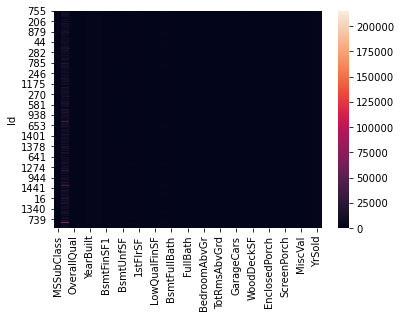

In [69]:
sns.heatmap(Xtrain)

In [77]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
imputed_xtrain=pd.DataFrame(imp.fit_transform(Xtrain))
imputed_xtest=pd.DataFrame(imp.transform(Xtest))
imputed_xtrain.columns=Xtrain.columns
imputed_xtest.columns=Xtest.columns

In [89]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
model.fit(Xtrain,Ytrain)


RandomForestRegressor(random_state=0)

In [97]:
print(Xtest)

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
485           20     7758            5            7       1962          2001   
10           190     7420            5            6       1939          1950   
530           20    32668            6            3       1957          1975   
629           60    11606            5            5       1969          1969   
1306          20    13173            9            5       2006          2007   
...          ...      ...          ...          ...        ...           ...   
830          160     2544            7            5       2005          2005   
573           60    13159            7            5       2009          2009   
1207          20     8900            4            4       1966          1966   
274           20     9600            6            6       1958          1988   
98            20    10921            4  

In [116]:
from sklearn.metrics import mean_absolute_error
pred=model.predict(Xtest)
print(mean_absolute_error(Ytest,pred))

19622.86957762557


No handles with labels found to put in legend.


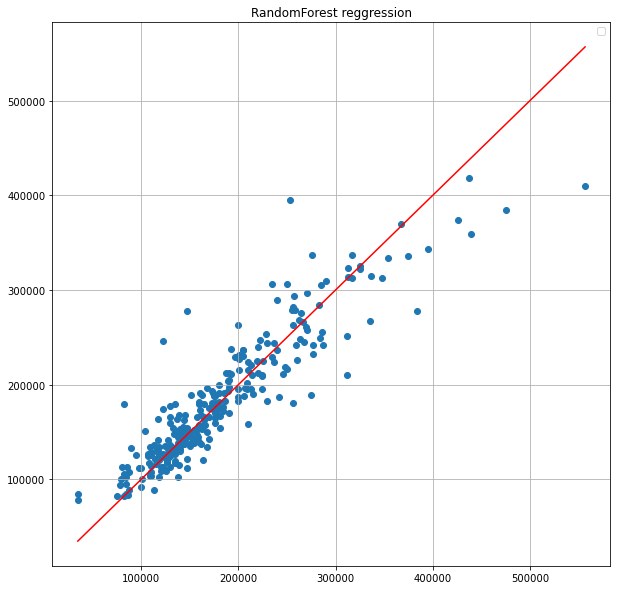

In [134]:
pt.figure(figsize=(10,10))
pt.scatter(Ytest,pred,alpha=1)
pt.plot([min(Ytest),max(Ytest)],[min(Ytest),max(Ytest)],color='red')
pt.title("RandomForest reggression")
pt.legend()

pt.grid(True)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
fores=RandomForestClassifier(n_estimators=100)
fores.fit(Xtrain,Ytrain)
pred=fores.predict(Xtest)
print("predicitons",pred)


predicitons [127000 119000 244000 185000 377500 125500 240000 185000 130000 191000
 171500  79000 124000 225000 127000 228500 135000 119000 290000 167000
 157500 285000 119000 211000 155000 119000 124000 168500 319000 187500
 140000 235128 110000 143000 281213 179000 168000 131500 210000 155000
 128000 128000 129000 127000 236000 133000 159500 174900 118500 137000
 230000  82000 140000 158000 307000 141000 155000  87000 175000 145000
 141000 187500 250000 188000 250000 134000 214000 160000 126000 130000
 262500 115000 100000 250000 255500 275000 154000 210000  83000 140000
 140000 155000 361919 290000 132000  52500 176000 190000 181000 274000
 137000 179900 178000 205000 126000 107500 145000 127000 180500 104900
 214000 140000 235000 100000 150000 175500  80000 189000 192000 125000
 375000 231500  92000 192000 340000 221000 220000 133000  97000 146000
 269790 278000 135000 105500 132000 124000 165000 176432 140000  37900
 159500  91300 138500 325624 215000 130000 275000 149000 106500 1

In [ ]:
con=confusion_matrix(Ytest,pred)
sns.heatmap(con)

In [114]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encode=OneHotEncoder()
data=[['red'],['blue'],['green'],['sudha']]
encode.fit(data)
encodedata=encode.transform(data).toarray()
print(encodedata)

#dummies
df=pd.DataFrame(data)
pd.get_dummies(df)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


,0_blue,0_green,0_red,0_sudha
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
